## Essential Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from scipy.sparse import hstack
from scipy import stats

from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
import urllib 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast


from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import seaborn as sns
import matplotlib.pyplot as plt
import os 

import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
%matplotlib inline

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## Importing Datasets

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [5]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


In [6]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Exploratory Data Analysis

## Check Class Imbalance

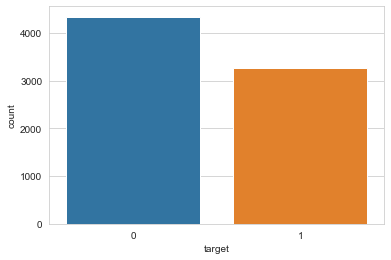

In [8]:
target = df_train['target']
sns.set_style('whitegrid')
sns.countplot(target)

## Check Text Content

In [9]:
df_train['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [10]:
#To check the text content we can use a list
df_train["text"].tolist()[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

In [11]:
# to make it more readable
t = df_train["text"].to_list()
for i in range(5):
    print('Tweet Number '+str(i+1)+': '+t[i])

Tweet Number 1: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Tweet Number 2: Forest fire near La Ronge Sask. Canada
Tweet Number 3: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Tweet Number 4: 13,000 people receive #wildfires evacuation orders in California 
Tweet Number 5: Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


## Tweet Locations

In [12]:
locations = df_train['location'].to_list()
print('There is '+ str(len(set(locations)))+" different loction")

There is 3342 different loction


## Top 20 Posting Locations

In [13]:
df_train['location'].value_counts().head(n=20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
California          17
California, USA     15
Everywhere          15
New York, NY        15
Florida             14
Name: location, dtype: int64

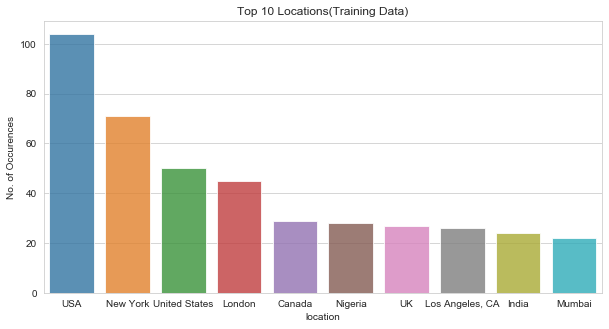

In [14]:
location_count = df_train['location'].value_counts()
location_count = location_count[:10, ]

plt.figure(figsize = (10, 5))
sns.barplot(location_count.index, location_count.values, alpha = 0.8)
plt.title('Top 10 Locations(Training Data)')
plt.xlabel('location')
plt.ylabel('No. of Occurences')
plt.show()

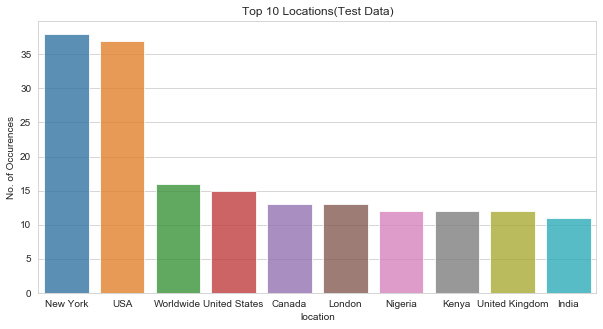

In [15]:
location_count = df_test['location'].value_counts()
location_count = location_count[:10, ]

plt.figure(figsize = (10, 5))
sns.barplot(location_count.index, location_count.values, alpha = 0.8)
plt.title('Top 10 Locations(Test Data)')
plt.xlabel('location')
plt.ylabel('No. of Occurences')
plt.show()

## t-Distributed Stochastic Neighbor Embedding (tsne) to check Dimentionality Reduction (Location)

### Label Encoding location column

In [16]:
df = df_train[df_train['location'].notnull()]

In [17]:
le = preprocessing.LabelEncoder()
df['location'] = le.fit_transform(df.location.values)

In [18]:
X = df['location']
y = df['target']

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values.reshape(-1, 1))
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 3.7e+01 s


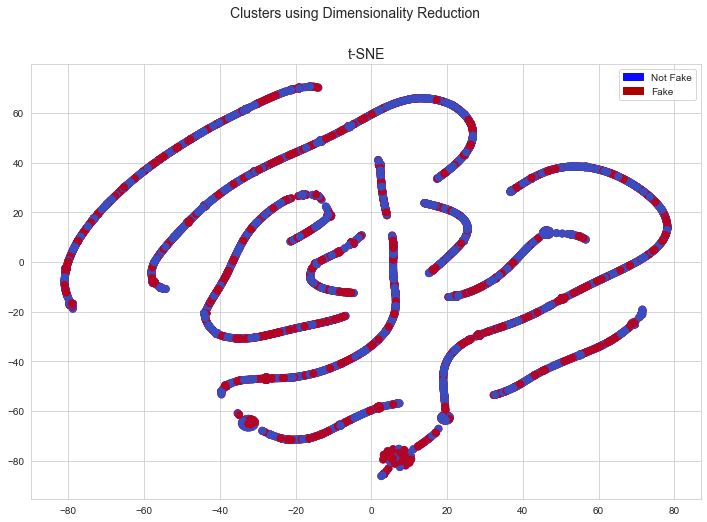

In [19]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Fake')
red_patch = mpatches.Patch(color='#AF0000', label='Fake')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Fake', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fake', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

plt.show()

## Top 20 keywords

In [20]:
df_train['keyword'].value_counts().head(n=20)

fatalities     45
armageddon     42
deluge         42
sinking        41
damage         41
body%20bags    41
harm           41
collided       40
fear           40
evacuate       40
siren          40
windstorm      40
outbreak       40
twister        40
weapon         39
famine         39
collision      39
weapons        39
wreckage       39
sinkhole       39
Name: keyword, dtype: int64

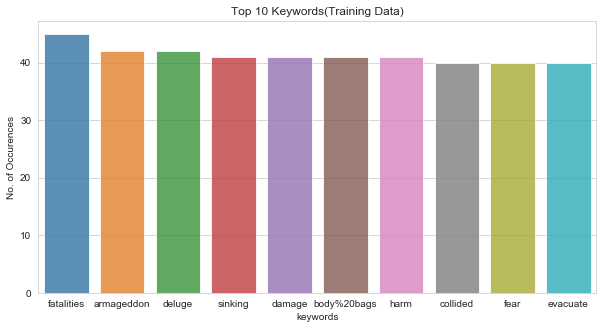

In [21]:
location_count = df_train['keyword'].value_counts()
location_count = location_count[:10, ]

plt.figure(figsize = (10, 5))
sns.barplot(location_count.index, location_count.values, alpha = 0.8)
plt.title('Top 10 Keywords(Training Data)')
plt.xlabel('keywords')
plt.ylabel('No. of Occurences')
plt.show()

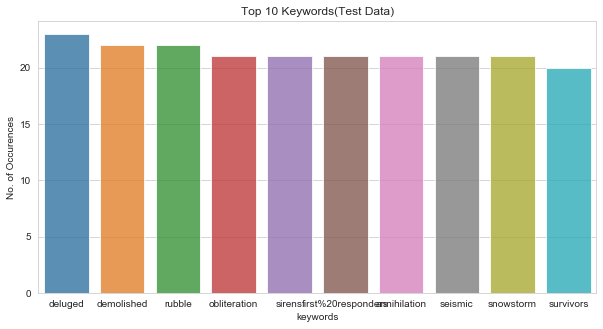

In [22]:
location_count = df_test['keyword'].value_counts()
location_count = location_count[:10, ]

plt.figure(figsize = (10, 5))
sns.barplot(location_count.index, location_count.values, alpha = 0.8)
plt.title('Top 10 Keywords(Test Data)')
plt.xlabel('keywords')
plt.ylabel('No. of Occurences')
plt.show()

## t-Distributed Stochastic Neighbor Embedding (tsne) to check Dimentionality Reduction (Keywords)

In [23]:
df = df_train[df_train['keyword'].notnull()]

le = preprocessing.LabelEncoder()
df['keyword'] = le.fit_transform(df.keyword.values)

In [24]:
X = df['keyword']
y = df['target']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values.reshape(-1, 1))
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 4e+01 s


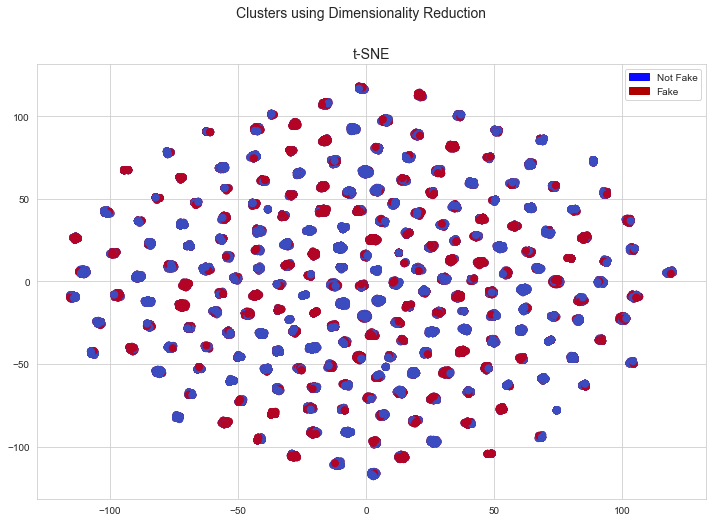

In [25]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))
# labels = ['Not Fake', 'Fake']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Fake')
red_patch = mpatches.Patch(color='#AF0000', label='Fake')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Fake', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fake', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


plt.show()

## Text Analysis

In [26]:
len(set(df_train['text']))

7503

In [27]:
len(set(df_test['text']))

3243

# Topic Modeling

# Latent Dirichlet Allocation (LDA)

#### Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

In [28]:
html_tags = ['<P>', '</P>', '<Table>', '</Table>', '<Tr>', '</Tr>', '<Ul>', '<Ol>', '<Dl>', '</Ul>', '</Ol>', \
             '</Dl>', '<Li>', '<Dd>', '<Dt>', '</Li>', '</Dd>', '</Dt>']
r_buf = ['It', 'is', 'are', 'do', 'does', 'did', 'was', 'were', 'will', 'can', 'the', 'a', 'of', 'in', 'and', 'on', \
         'what', 'where', 'when', 'which'] + html_tags

In [29]:
def clean(x):
    x = x.lower()
    for r in r_buf:
        x = x.replace(r, '')
    x = re.sub(' +', ' ', x)
    return x

In [30]:
bin_question_tokens = ['it', 'is', 'are', 'do', 'does', 'did', 'was', 'were', 'will', 'can']
stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

In [31]:
def predict(json_data, annotated=False):
    # Parse JSON data
    candidates = json_data['long_answer_candidates']
    candidates = [c for c in candidates if c['top_level'] == True]
    doc_tokenized = json_data['document_text'].split(' ')
    question = json_data['question_text']
    question_s = question.split(' ') 
    if annotated:
        ann = json_data['annotations'][0]

    # TFIDF for the document
    tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words=stop_words)
    tfidf.fit([json_data['document_text']])
    q_tfidf = tfidf.transform([question]).todense()

    # Find the nearest answer from candidates
    distances = []
    scores = []
    i_ann = -1
    for i, c in enumerate(candidates):
        s, e = c['start_token'], c['end_token']
        t = ' '.join(doc_tokenized[s:e])
        distances.append(levenshtein_distance(clean(question), clean(t)))
        
        t_tfidf = tfidf.transform([t]).todense()
        score = 1 - spatial.distance.cosine(q_tfidf, t_tfidf)
        scores.append(score)

    ans = candidates[np.argmax(scores)]
    if np.max(scores) < 0.2:
        ans_long = '-1:-1'
    else:
        ans_long = str(ans['start_token']) + ':' + str(ans['end_token'])
    if question_s[0] in bin_question_tokens:
        ans_short = 'YES'
    else:
        ans_short = ''
        
    # Preparing data for debug
    if annotated:
        ann_long_text = ' '.join(doc_tokenized[ann['long_answer']['start_token']:ann['long_answer']['end_token']])
        if ann['yes_no_answer'] == 'NONE':
            if len(json_data['annotations'][0]['short_answers']) > 0:
                ann_short_text = ' '.join(doc_tokenized[ann['short_answers'][0]['start_token']:ann['short_answers'][0]['end_token']])
            else:
                ann_short_text = ''
        else:
            ann_short_text = ann['yes_no_answer']
    else:
        ann_long_text = ''
        ann_short_text = ''
        
    ans_long_text = ' '.join(doc_tokenized[ans['start_token']:ans['end_token']])
    if len(ans_short) > 0 or ans_short == 'YES':
        ans_short_text = ans_short
    else:
        ans_short_text = '' # Fix when short answers will work
                    
    return ans_long, ans_short, question, ann_long_text, ann_short_text, ans_long_text, ans_short

In [32]:
reindexed_data = df_train['text']

In [33]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii',errors="ignore").decode('utf-8',errors="ignore") for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [34]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

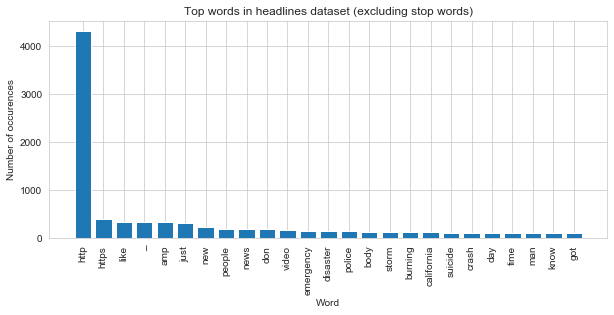

In [35]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

#### Next we generate a histogram of headline word lengths, and use part-of-speech tagging to understand the types of words used across the corpus. This requires first converting all headline strings to TextBlobs and calling the pos_tags method on each, yielding a list of tagged words for each headline.

In [36]:
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [37]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  122724
Mean number of words per tweet:  16.120320504400368


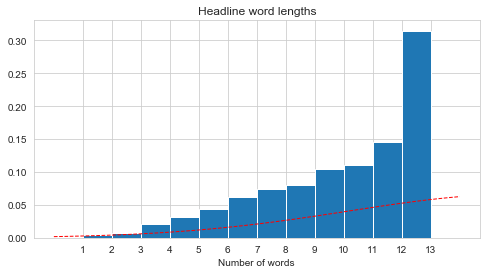

In [38]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(8,4))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

## Part-of-Speech Tagging for questions Corpus

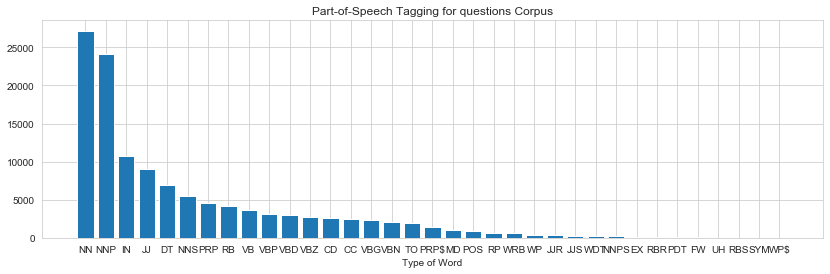

In [39]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(14,4))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for questions Corpus');
ax.set_xlabel('Type of Word');

## Preprocessing
#### The only preprocessing step required in our case is feature construction, where we take the sample of text tweets and represent them in some tractable feature space. In practice, this simply means converting each string to a numerical vector. This can be done using the CountVectorizer object from SKLearn, which yields an  n×K  document-term matrix where  K  is the number of distinct words across the  n  headlines in our sample (less stop words and with a limit of max_features).

In [40]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=500, random_state=0).values

print('Tweets before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Tweets after vectorization: \n{}'.format(small_document_term_matrix[123]))

Tweets before vectorization: NowPlaying Rock You Like A Hurricane - Scorpions http://t.co/JRztpT8IJq
Tweets after vectorization: 
  (0, 1315)	1
  (0, 1564)	1
  (0, 1328)	1
  (0, 2263)	1
  (0, 1841)	1
  (0, 2339)	1
  (0, 1447)	1


In [41]:
#number of topics
n_topics = 5

## Latent Semantic Analysis (LSA)

In [42]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [43]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [44]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [45]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii',errors="ignore").decode('utf-8',errors="ignore"))
        top_words.append(" ".join(topic_words))         
    return top_words

In [46]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  http _ new news police set storm people wildfire video
Topic 2:  like https amp don man body day think _ car
Topic 3:  people saudi suicide mosque http bomber want let kills bombing
Topic 4:  just twitter love got im let armageddon sure gas hard
Topic 5:  al zabadani bout theblackshag waste blizzard toxic asf ahrar dee


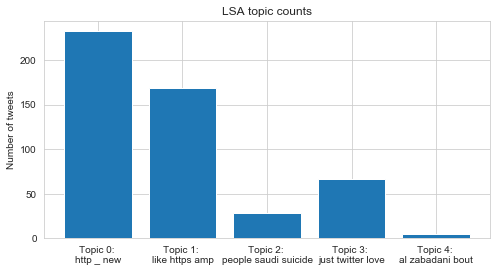

In [47]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of tweets');
ax.set_title('LSA topic counts');
plt.show()

#### However, this does not provide a great point of comparison with other clustering algorithms. In order to properly contrast LSA with LDA we instead use a dimensionality-reduction technique called t-SNE, which will also serve to better illuminate the success of the clustering process.

In [48]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.049197
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.495544
[t-SNE] KL divergence after 2000 iterations: 0.239288


#### Now that we have reduced these n_topics-dimensional vectors to two-dimensional representations, we can then plot the clusters using Bokeh. Before doing so however, it will be useful to derive the centroid location of each topic, so as to better contextualise our visualisation.

In [49]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [50]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [51]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

# Latent Dirichilet Allocation (LDA)

In [52]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [53]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [54]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  http police just accident https world car black killed avalanche
Topic 2:  http news _ new suicide saudi set mosque life bomber
Topic 3:  http https people like amp disaster want storm look rt
Topic 4:  http like amp airplane accident man emergency drought fires _
Topic 5:  http just don love got new like day fatalities burned


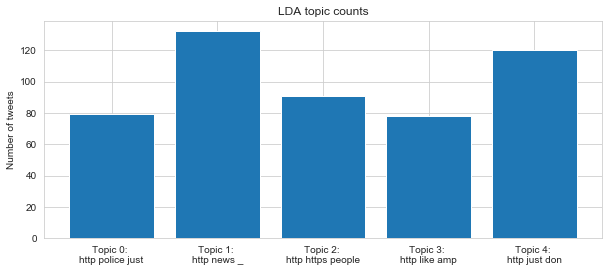

In [55]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of tweets');

#### However, in order to properly compare LDA with LSA, we again take this topic matrix and project it into two dimensions.

In [56]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.015812
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.557228
[t-SNE] KL divergence after 1250 iterations: 0.041864


In [57]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=600, plot_height=600)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

# LDA with an other way of visualisation

In [58]:
# Preparing a corpus for analysis and checking the first 5 entries
corpus=[]

corpus = df_train['text'].to_list()

corpus[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

In [59]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\chamolia\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [60]:
# removing common words and tokenizing
# google-quest-challenge
stoplist = stopwords.words('english') + list(punctuation) + list("([)]?") + [")?"]

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'tweets.dict'))  # store the dictionary

2020-03-17 23:55:38,815 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-03-17 23:55:39,069 : INFO : built Dictionary(27812 unique tokens: ['#earthquake', 'allah', 'deeds', 'forgive', 'may']...) from 7613 documents (total 77807 corpus positions)
2020-03-17 23:55:39,071 : INFO : saving Dictionary object under C:\Users\chamolia\AppData\Local\Temp\tweets.dict, separately None
2020-03-17 23:55:39,090 : INFO : saved C:\Users\chamolia\AppData\Local\Temp\tweets.dict


In [61]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'tweets.mm'), corpus) 

2020-03-17 23:55:39,248 : INFO : storing corpus in Matrix Market format to C:\Users\chamolia\AppData\Local\Temp\tweets.mm
2020-03-17 23:55:39,251 : INFO : saving sparse matrix to C:\Users\chamolia\AppData\Local\Temp\tweets.mm
2020-03-17 23:55:39,252 : INFO : PROGRESS: saving document #0
2020-03-17 23:55:39,281 : INFO : PROGRESS: saving document #1000
2020-03-17 23:55:39,318 : INFO : PROGRESS: saving document #2000
2020-03-17 23:55:39,376 : INFO : PROGRESS: saving document #3000
2020-03-17 23:55:39,420 : INFO : PROGRESS: saving document #4000
2020-03-17 23:55:39,463 : INFO : PROGRESS: saving document #5000
2020-03-17 23:55:39,508 : INFO : PROGRESS: saving document #6000
2020-03-17 23:55:39,553 : INFO : PROGRESS: saving document #7000
2020-03-17 23:55:39,579 : INFO : saved 7613x27812 matrix, density=0.036% (76362/211732756)
2020-03-17 23:55:39,582 : INFO : saving MmCorpus index to C:\Users\chamolia\AppData\Local\Temp\tweets.mm.index


## Creating a transformation

In [62]:
tfidf = models.TfidfModel(corpus)

2020-03-17 23:55:39,598 : INFO : collecting document frequencies
2020-03-17 23:55:39,599 : INFO : PROGRESS: processing document #0
2020-03-17 23:55:39,638 : INFO : calculating IDF weights for 7613 documents and 27812 features (76362 matrix non-zeros)


In [63]:
corpus_tfidf = tfidf[corpus]

In [64]:
#I will try 10 topics
total_topics = 10

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tf

2020-03-17 23:55:39,838 : INFO : using symmetric alpha at 0.1
2020-03-17 23:55:39,840 : INFO : using symmetric eta at 0.1
2020-03-17 23:55:39,855 : INFO : using serial LDA version on this node
2020-03-17 23:55:39,920 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 7613 documents, updating model once every 2000 documents, evaluating perplexity every 7613 documents, iterating 50x with a convergence threshold of 0.001000
2020-03-17 23:55:39,922 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-03-17 23:55:39,924 : INFO : PROGRESS: pass 0, at document #2000/7613
2020-03-17 23:55:41,954 : INFO : merging changes from 2000 documents into a model of 7613 documents
2020-03-17 23:55:42,006 : INFO : topic #9 (0.100): 0.006*"body" + 0.005*"collided" + 0.005*"??" + 0.005*"????" + 0.004*"man" + 0.004*"car" + 0.003*"get" + 0.003*"i'm" + 0.003*"crashed" + 0.003*"k

In [65]:
lda.show_topics(total_topics,5)

[(0,
  '0.015*"sinking" + 0.012*"wildfire" + 0.011*"officer" + 0.007*"via" + 0.006*"40"'),
 (1,
  '0.011*"failure" + 0.011*"get" + 0.010*"war" + 0.010*"tragedy" + 0.009*"forest"'),
 (2,
  '0.021*"i\'m" + 0.009*"weapons" + 0.008*"like" + 0.005*"soudelor" + 0.005*"let"'),
 (3,
  '0.013*"families" + 0.010*"3" + 0.008*"nuclear" + 0.007*"natural" + 0.007*"pic"'),
 (4,
  '0.012*"disaster" + 0.011*"thunderstorm" + 0.009*"northern" + 0.007*"wild" + 0.007*"one"'),
 (5,
  '0.010*"&amp;" + 0.010*"video" + 0.008*"rt" + 0.008*"suspect" + 0.008*"pm:"'),
 (6,
  '0.013*"trapped" + 0.011*"violent" + 0.010*"terrorist" + 0.009*"like" + 0.008*"movie"'),
 (7,
  '0.011*"obama" + 0.010*"severe" + 0.009*"weapon" + 0.009*"pkk" + 0.008*"survivors"'),
 (8,
  '0.033*"suicide" + 0.012*"released" + 0.011*"saudi" + 0.009*"trauma" + 0.009*"mosque"'),
 (9,
  '0.012*"wounded" + 0.011*"storm" + 0.009*"mh370:" + 0.008*"like" + 0.008*"??"')]

In [66]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [67]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(10, 210)


In [68]:
df_lda

,sinking,wildfire,officer,via,40,never,policy,#??,land,bigger,weather,evacuation,spot,california,new,threat,emotional,--,displaced,fire,upon,people,expected,super,û_,...,caused,mass,15,injuries,harm,half,calgary,video:,face,woman,site,wounded,mh370:,smoke,survive,????,know,love,u,hazardous,boat,fuck,good,much,got
0,0.014847,0.011994,0.010772,0.006537,0.006168,0.00592,0.005151,0.004803,0.004611,0.004529,0.004414,0.004152,0.003947,0.003766,0.003455,0.003307,0.003191,0.003099,0.003088,0.003021,0.003011,0.002934,0.002891,0.002877,0.002842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004919,0.000000,0.004188,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006211,0.000000,0.000000,0.000000,0.000000,0.000000,0.003876,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.005696,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003867,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.004172,0.000000,0.00000,0.000000,0.00

2020-03-17 23:55:46,259 : INFO : NumExpr defaulting to 8 threads.


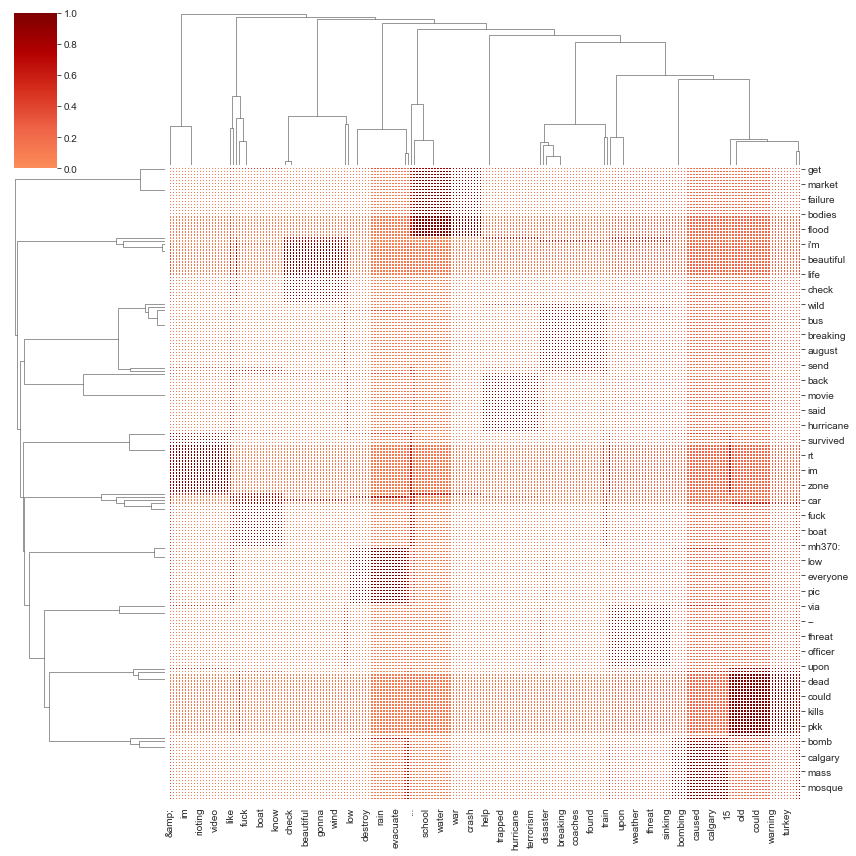

In [69]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="OrRd", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [70]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  29.176176
1       0.648955  71.707100       2        1  23.859379
7      71.019684   9.971006       3        1   8.914469
2       3.785981  33.185135       4        1   6.542477
6     -42.666500  -9.222070       5        1   6.094545
4      -3.621689 -43.526516       6        1   5.102680
5      -3.632402  -4.171708       7        1   5.080074
8     -36.584400  35.804413       8        1   5.077276
0      44.391380  50.615383       9        1   5.076787
3      40.235809 -31.591665      10        1   5.076131, topic_info=         Term       Freq      Total Category  logprob  loglift
2482  suicide  12.000000  12.000000  Default  30.0000  30.0000
5593  wounded  26.000000  26.000000  Default  29.0000  29.0000
62        i'm  27.000000  27.000000  Default  28.0000  28.0000
7169  failure  19.000000  19.000000  Default  27.0000  27.0000
4262  tragedy  18.000000  18.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
259       get   1.496775  38.447521  Topic10  -5.5537  -0.2654
178      much   1.140132  10.821314  Topic10  -5.8258   0.7302
1672    video   1.153381  13.780551  Topic10  -5.8143   0.5001
195    police   1.113385  15.333980  Topic10  -5.8496   0.3580
834      want   1.076696   6.840984  Topic10  -5.8831   1.1316

[591 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
4534       9  0.995438          #??
0          1  1.032802  #earthquake
6090       9  0.722670        #gbbo
14271      2  0.927365       #islam
863        1  0.321194        #news
...      ...       ...          ...
1565       5  1.092704        zone.
1595       1  0.196807          û_
1595       3  0.196807          û_
1595       7  0.196807          û_
1595       9  0.196807          û_

[831 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 8, 3, 7, 5, 6, 9, 1, 4])